<a href="https://colab.research.google.com/github/masatokg/AI_teach2020/blob/master/2020AI0302_detect_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenCVで人間の顔(正面)を認識する

### 必要なライブラリのimport

In [1]:
# 画像を表示するためにpyplot
import matplotlib.pyplot as plt
# openCV
import cv2
# webからダウンロードするため
import urllib.request as req

### 対象の画像をダウンロードして保存、プログラムへ読込

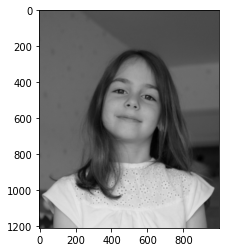

In [2]:
# カスケードファイルをインターネット(web)から取得
# ダウンロード元のurl文字列
url = "https://github.com/masatokg/book-mlearn-gyomu/raw/master/src/ch3/face/girl.jpg"
# 保存ファイル名
savefile = "girl.png"
# 画像をダウンロードして保存
req.urlretrieve(url, savefile)
# 保存した画像をプログラムに読み込む
img = cv2.imread(savefile)
# 物体認識するために、白黒(グレースケール)に変換した画像イメージを作る
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 画像のプロットを作って表示
# plt.imshow(img_gray)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

### カスケードファイルをダウンロードしてカスケード式物体検出器(学習モデル)を生成

In [3]:
# カスケードファイルをダウンロード
# ダウンロード元のurl文字列
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml"
# 保存ファイル名
cascade_file = "cascade_file.xml"
# XMLをダウンロードして保存
req.urlretrieve(url, cascade_file)
# カスケードXMLをプログラムに読み込む(学習モデルのインスタンスを生成)
cascade = cv2.CascadeClassifier(cascade_file)

### 顔認識を実行して検知リストを取得する

In [4]:
# 白黒画像とカスケード物体検出器モデルを使って顔認識を実行する
# 引数のminSizeは画像の中で物体として認識する最小エリアサイズ
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
# 結果を認識
if len(face_list) == 0:
  print("検出数はゼロでした")
else:
  print( "検出数：", len(face_list), "件" )
# if文終了


検出数： 1 件


### 検出したエリアに四角形(rectangle)を描く

In [5]:
# 検出した数だけループ(face_listは(x, y, w, h)というタプルの配列リスト)
for (x, y, w, h) in face_list:
  print("顔の座標: x=", x, " y=", y, "横幅W=", w, " 縦幅H=", h)
  # 矩形(rectangle)の色ピクセル情報を定義
  red = ( 0, 0, 255) # BGRで3色のタプルを定義
  # img画像(元の画像)に矩形を追加 引数は 対象画像、矩形の左上座標、右下座標、色情報、線の細さの順
  cv2.rectangle( img, (x,y), (x+w, y+h), red, thickness=20 )
# for文の終了
 

顔の座標: x= 319  y= 308 横幅W= 405  縦幅H= 405


### 枠線が追加された画像をファイル保存し、画面にも表示

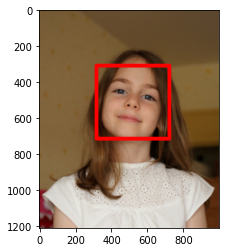

In [6]:
# 矩形が追加された画像データ(img)をファイル保存
cv2.imwrite("face-detect.png", img)
# 表示用のプロットを作成
plt.imshow( cv2.cvtColor( img, cv2.COLOR_BGR2RGB ) )
# プロットを画面に表示
plt.show()


## 検知したエリアにモザイクをかける

### モザイクをかける処理の関数を作成する

In [7]:
# モザイク処理の関数 mosaic
# 引数は 対象画像、エリアを表すタプル(左上のx座標y座標、右下のx座標y座標)、縮小時のサイズ
def mosaic( img, rect, size ):
  # モザイクをかける領域座標を変数に代入
  (x1, y1, x2, y2) = rect 
  w = x2 - x1 # 横幅を計算
  h = y2 - y1 # 縦幅を計算
  # 画像データを[開始行:終了行, 開始列:終了列]で指定して切り抜き
  i_rect = img[ y1:y2, x1:x2 ]
  # 切り抜いた画像を指定サイズに縮小して(ピクセルをつぶす)コピー
  i_small = cv2.resize( i_rect, ( size, size ) )
  # 縮小した画像データを元のサイズに拡大する(つぶれたピクセル情報のまま拡大される)
  # interpolation は拡大時にどんなピクセルで補完するかを指定
  i_mos = cv2.resize( i_small, (w, h), interpolation=cv2.INTER_AREA )
  # できあがったモザイクデータを元の画像(のコピー)に重ねる
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos # 行, 列で指定した領域にi_mosを上書き
  return img2 # できあがったモザイクつきのコピーをリターン
# 関数定義:mosaic 終了

## 猫の画像の領域を指定してモザイクをかける

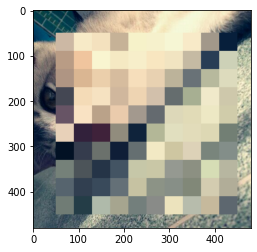

In [8]:
# 猫の画像のurl
url = "https://github.com/masatokg/book-mlearn-gyomu/raw/master/src/ch3/face/cat.jpg"
cat_file = "cat.png"
req.urlretrieve( url, cat_file )
# 猫の画像データを読み込む
img_cat = cv2.imread(cat_file)
# 領域を指定してモザイクをかける
mos = mosaic( img_cat, (50, 50, 450, 450), 10 )
# モザイクをかけた画像(mos)を表示
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow( cv2.cvtColor( mos, cv2.COLOR_BGR2RGB ) )
plt.show()

### 物体検知した顔に自動でモザイクをかける

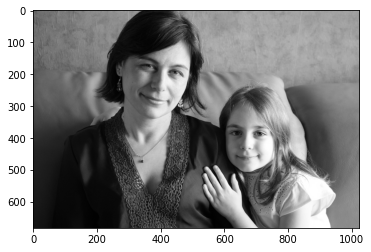

In [9]:
# カスケードファイルの読込（一回やっているのでやらなくてもいい）
# カスケードXMLをプログラムに読み込む(学習モデルのインスタンスを生成)
cascade = cv2.CascadeClassifier(cascade_file)

# 検知対象の画像をダウンロード
url = "https://raw.githubusercontent.com/masatokg/book-mlearn-gyomu/master/src/ch3/face/family.jpg"
family_file = "fmalily.png"
# ダウンロードして保存
req.urlretrieve(url, family_file)
# 保存した画像を読み込む
img_family = cv2.imread( family_file )
img_family_gray = cv2.cvtColor( img_family, cv2.COLOR_BGR2GRAY )
# 白黒画像を表示
plt.imshow( cv2.cvtColor( img_family_gray, cv2.COLOR_BGR2RGB ) )
plt.show()

### 自作した関数（mosaic）で画像で顔を検出してモザイクをかける

2 件見つかりました


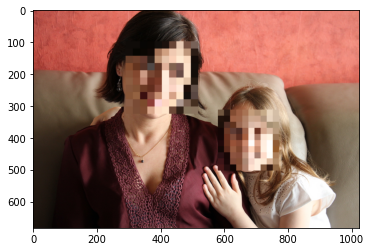

In [10]:
# 画像から自作関数で顔を検出
face_list = cascade.detectMultiScale( img_family_gray, minSize=(150, 150) )
# 検出失敗したらメッセージを表示
if len(face_list)==0: print("顔が見つかりません")
else : print( len(face_list), "件見つかりました" )
# 検出したエリアに自作関数でモザイクをかける
for( x, y, w, h ) in face_list:
  img_family = mosaic( img_family, (x, y, x+w, y+h), 10 )
# for文終了
# モザイクをつけた画像を表示
cv2.imwrite( "family-mosaic.png", img_family ) #画像保存
plt.imshow( cv2.cvtColor( img_family, cv2.COLOR_BGR2RGB ) )
plt.show()